# DSC Campaigns
### Team 9 Members:
##### Omar Mantilla
##### Ahmad Omar Nakib
##### Pedro Roman Infante

Libraries

In [292]:
import sys
import pandas as pd
import datetime as dt
from pandas               import DataFrame
from pandas               import read_csv
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
import matplotlib.pyplot  as plt
import plotly.graph_objects as go
import seaborn as sns

# Dataset upload

#### Donors

In [293]:
# Upload Donors Dataset
donors_full = read_csv("./GROUP ASSIGNMENT DSC use-case-20211202/donors.csv")
donors_full.head()

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [294]:
campaign6169 = read_csv("./GROUP ASSIGNMENT DSC use-case-20211202/selection campaign 6169.csv")

In [295]:
# Filtering donors by campaign 6169 
donors = pd.merge(donors_full, campaign6169, on="donorID", how="inner")

In [296]:
donors.loc[donors['gender'] == 'M','gender'] = 1
donors.loc[donors['gender'] == 'F','gender'] = 0


In [297]:
# Extract Date from csv
donors["dateOfBirth"] = pd.to_datetime(donors["dateOfBirth"])

# Year
donors["birth_year"] = donors["dateOfBirth"].dt.year

# Donnors Age
donors['age'] = 2008 - donors["birth_year"]

# Age group
donors['age_group'] = donors['age'] // 10 * 10

#### Gifts

In [298]:
# Upload gifts Dataset
gifts = read_csv("./GROUP ASSIGNMENT DSC use-case-20211202/gifts.csv")
gifts.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,"12,39",2004-03-23
1,1,100001,1577.0,"12,39",2007-10-11
2,2,100001,1634.0,"6,69",2007-12-28
3,3,100001,1778.0,"24,79",2008-06-14
4,4,100001,1808.0,"7,44",2008-07-09


In [299]:
gifts['amount'] = gifts['amount'].str.replace(',','.')

In [300]:
gifts['amount'] = gifts['amount'].astype(float)

# Data Cleaning

In [301]:
# Extract Date from csv
gifts["date"] = pd.to_datetime(gifts["date"])

# Year
gifts["year"] = gifts["date"].dt.year

# Month
gifts["month"] = gifts["date"].dt.month

# Day
gifts["day"] = gifts["date"].dt.day


In [302]:
# Replace NaN with 0
gifts["campaignID"].fillna(0, inplace = True)

# New Column to Identify missing CampaingIDs
gifts["Missing_CampaingID"] = 0
gifts.loc[gifts["campaignID"] == 0, "Missing_CampaingID"] = 1

# Filter

In [303]:
# Filtered by gifts done before 4-AUG-2008
gifts_training = gifts.loc[(pd.to_datetime(gifts["date"])>=dt.datetime(2013,8,4)) & (pd.to_datetime(gifts["date"])<=dt.datetime(2018,8,4)),:]


In [304]:
gifts_training.head()

,Unnamed: 0,donorID,campaignID,amount,date,year,month,day,Missing_CampaingID
12,12,100002,3941.0,20.0,2015-01-10,2015,1,10,0
13,13,100003,4801.0,5.0,2017-07-27,2017,7,27,0
14,14,100003,4830.0,3.0,2017-08-11,2017,8,11,0
15,15,100003,4990.0,3.0,2017-09-16,2017,9,16,0
16,16,100003,5326.0,4.0,2018-06-15,2018,6,15,0


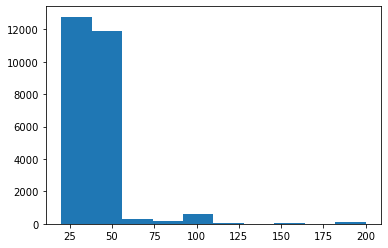

In [305]:
fig, axs = plt.subplots()
axs.hist( gifts_training["amount"], bins=10, range = [20,200])
plt.show()

## Feature Engineering

In [306]:
donations_per_donor = gifts_training.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_per_donor = donations_per_donor.rename({"min":"min_donation_per_donor", 
                             "max":"max_donation_per_donor", 
                             "sum":"total_donations_per_donor", 
                             "count":"total_donation_times",
                            "mean":"avg_donations_per_donor"}, axis=1)


In [307]:
# Extract the donations in the last 3 months
donations_3months = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2018,5,4),:]
donations_donor_3months = donations_3months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3months = donations_donor_3months.rename({"min":"3m_min_donation_per_donor", 
                             "max":"3m_max_donation_per_donor", 
                             "sum":"3m_total_donations_per_donor", 
                             "count":"3m_total_donation_times",
                                "mean":"3m_avg_donations_per_donor"}, axis=1)

In [308]:
# Extract the donations in the last 6 months
donations_6months = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2018,2,4),:]
donations_donor_6months = donations_6months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count','mean'])
donations_donor_6months = donations_donor_6months.rename({"min":"6m_min_donation_donor", 
                             "max":"6m_max_donation_per_donor", 
                             "sum":"6m_total_donations_per_donor", 
                             "count":"6m_total_donation_times",
                              "mean": "6m_avg_donations_per_donor"}, axis=1)

In [309]:
# Extract the donations in the last 9 months

donations_9months = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2017,11,4),:]
donations_donor_9months = donations_9months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_9months = donations_donor_9months.rename({"min":"9m_min_donation_donor", 
                             "max":"9m_max_donation_per_donor", 
                             "sum":"9m_total_donations_per_donor", 
                             "count":"9m_total_donation_times",
                              "mean":"9m_avg_donations_per_donor"}, axis=1)

In [310]:
# Extract the donations in the last year

donations_year = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2017,8,4),:]
donations_donor_year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_year = donations_donor_year.rename({"min":"yr_min_donation_donor", 
                             "max":"yr_max_donation_per_donor", 
                             "sum":"yr_total_donations_per_donor", 
                             "count":"yr_total_donation_times",
                             "mean":"yr_avg_donations_per_donor"}, axis=1)

In [311]:
# Extract the donations in the last 2 years

donations_2year = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2016,8,4),:]
donations_donor_2year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_2year = donations_donor_2year.rename({"min":"2yr_min_donation_donor", 
                             "max":"2yr_max_donation_per_donor", 
                             "sum":"2yr_total_donations_per_donor", 
                             "count":"2yr_total_donation_times",
                             "mean": "2yr_avg_donations_per_donor"}, axis=1)

In [312]:
# Extract the donations in the last 3 years

donations_3year = gifts_training.loc[pd.to_datetime(gifts_training["date"])>=dt.datetime(2015,8,4),:]
donations_donor_3year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3year = donations_donor_3year.rename({"min":"3yr_min_donation_donor", 
                             "max":"3yr_max_donation_per_donor", 
                             "sum":"3yr_total_donations_per_donor", 
                             "count":"3yr_total_donation_times",
                             "mean":"3yr_avg_donations_per_donor"}, axis=1)

In [313]:
# Merging with total donations per donor
base_table = pd.merge(donors,donations_per_donor, on="donorID", how="left" )
base_table.fillna(0, inplace=True)

# Merging with 3 months count
base_table = pd.merge(base_table,donations_donor_3months, on="donorID", how="left" )
base_table.fillna(0, inplace = True)
# base_table.isna().sum()

#Merging with 6 months count
base_table = pd.merge(base_table,donations_donor_6months, on="donorID", how="left" )
base_table.fillna(0, inplace = True)
base_table.isna().sum()

#Merging with 9 months count
base_table = pd.merge(base_table,donations_donor_9months, on="donorID", how="left" )
base_table.fillna(0, inplace = True)
base_table.isna().sum()

#Merging with year count
base_table = pd.merge(base_table,donations_donor_year, on="donorID", how="left" )
base_table.fillna(0, inplace = True)
base_table.isna().sum()

# Merging with 2 year count
base_table = pd.merge(base_table,donations_donor_2year, on="donorID", how="left" )
base_table.fillna(0, inplace = True)
base_table.isna().sum()

# Merging with 3 year count
base_table = pd.merge(base_table,donations_donor_3year, on="donorID", how="left" )
base_table.fillna(0, inplace = True)

In [314]:
# Amount and count difference from 3 to 6 months
base_table["3m_6m_amt_diff"] = base_table["6m_total_donations_per_donor"] - base_table["3m_total_donations_per_donor"]
base_table["3m_6m_count_diff"] = base_table["6m_total_donation_times"] - base_table["3m_total_donation_times"] 
# Amount and count difference from 6 to 9 months
base_table["6m_9m_amt_diff"] = base_table["9m_total_donations_per_donor"] - base_table["6m_total_donations_per_donor"]
base_table["6m_9m_count_diff"] = base_table["9m_total_donation_times"] - base_table["6m_total_donation_times"] 
# Amount and count difference from 9 to 12 months
base_table["9m_yr_amt_diff"] = base_table["yr_total_donations_per_donor"] - base_table["9m_total_donations_per_donor"]
base_table["9m_yr_count_diff"] = base_table["yr_total_donation_times"] - base_table["9m_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table["2yr_yr_amt_diff"] = base_table["2yr_total_donations_per_donor"] - base_table["yr_total_donations_per_donor"]
base_table["2yr_yr_amt_diff"] = base_table["2yr_total_donation_times"] - base_table["yr_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table["2yr_yr_amt_diff"] = base_table["3yr_total_donations_per_donor"] - base_table["2yr_total_donations_per_donor"]
base_table["3yr_2yr_amt_diff"] = base_table["3yr_total_donation_times"] - base_table["2yr_total_donation_times"] 

In [315]:
# Creating max year variable 
grouped_year = gifts_training.groupby("donorID")['year'].agg(['max', 'min'])
grouped_year = grouped_year.rename({"max":"max_year", 'min':'min_year'}, axis=1)
grouped_year['year_diff'] = grouped_year['max_year']- grouped_year['min_year']
grouped_year['recency'] = 2018 - grouped_year['max_year']
grouped_year.isna().sum()

max_year     0
min_year     0
year_diff    0
recency      0
dtype: int64

In [316]:
base_table = pd.merge(base_table, grouped_year, on="donorID", how="left")
base_table.loc[base_table["max_year"].isna(),"max_year"] = 2018
base_table.loc[base_table["min_year"].isna(),"min_year"] = 2018
base_table.loc[base_table["year_diff"].isna(),"year_diff"] = 0
base_table.loc[base_table["recency"].isna(),"recency"] = 0
base_table["max_year"] = base_table["max_year"].astype(int)
base_table["min_year"] = base_table["min_year"].astype(int)

In [317]:
# Calculating average donations and amount of donations per year
# Adding 1 to avoid division by 0
base_table['donations_count_per_period'] = base_table['total_donation_times']/(base_table['year_diff'].astype(int)+1)
base_table['donations_amount_per_period'] = base_table['total_donations_per_donor']/(base_table['year_diff'].astype(int)+1)

### Outliers

#### Ranking donor as exceptional if they have donated above the 99th percentile


In [318]:
# Outliers from total donations per donor
percentiles_dict = base_table["total_donations_per_donor"].quantile([0.01,0.05,0.95,0.99]).to_dict()
upper_outliers = base_table[base_table["total_donations_per_donor"] > percentiles_dict[0.99]][["donorID","total_donations_per_donor"]]
base_table["exceptional_donor"] = base_table["donorID"].isin(upper_outliers["donorID"])
base_table["exceptional_donor"] = base_table["exceptional_donor"].replace({True:1, False:0})

# Ranking donors by donor's amount quantiles
amount_rank= base_table["total_donations_per_donor"].quantile([0.25,0.50,0.75]).to_dict()

base_table["donating_amt_rank"] = 1
base_table.loc[base_table["total_donations_per_donor"]> amount_rank[0.25], "donating_amt_rank"] = 2
base_table.loc[base_table["total_donations_per_donor"]> amount_rank[0.5], "donating_amt_rank"] = 3
base_table.loc[base_table["total_donations_per_donor"]> amount_rank[0.75], "donating_amt_rank"] = 4
base_table.loc[base_table["total_donations_per_donor"]> percentiles_dict[0.99], "donating_amt_rank"] = 5

#### Creating donation ranges to check how many times a donor has donated within that range


In [319]:
# Creating donation ranges to check how many times a donor has donated within that range
amount_range = gifts_training["amount"].quantile([0.20,0.40,0.60,0.8]).to_dict()

# Subsetting gifts df to obtain transactions lower than first quantile boundary, then counting by donor ID
count_1st_qtl = pd.DataFrame(
    gifts_training[gifts_training["amount"]<=amount_range[0.2]][["donorID"]].groupby("donorID")["donorID"].count())
count_1st_qtl = count_1st_qtl.rename({"donorID":"donations_1st_qtl_count"}, axis=1)
# Subsetting gifts df to obtain transactions between first and second quantile boundary, then counting by donor ID
count_2nd_qtl = pd.DataFrame(
    gifts_training[(gifts_training["amount"]>amount_range[0.2]) 
                               & (gifts_training["amount"]<=amount_range[0.4])][["donorID"]].groupby("donorID")["donorID"].count())
count_2nd_qtl = count_2nd_qtl.rename({"donorID":"donations_2nd_qtl_count"}, axis=1)

count_3rd_qtl = pd.DataFrame(
    gifts_training[(gifts_training["amount"]> amount_range[0.4])
                               & (gifts_training["amount"]<=amount_range[0.6])][["donorID"]].groupby("donorID")["donorID"].count())
count_3rd_qtl = count_3rd_qtl.rename({"donorID":"donations_3rd_qtl_count"}, axis=1)

count_4th_qtl = pd.DataFrame(
    gifts_training[(gifts_training["amount"]> amount_range[0.6]) 
                               & (gifts_training["amount"]<=amount_range[0.8])][["donorID"]].groupby("donorID")["donorID"].count())
count_4th_qtl = count_4th_qtl.rename({"donorID":"donations_4th_qtl_count"}, axis=1)

count_5th_qtl = pd.DataFrame(
    gifts_training[gifts_training["amount"]>=amount_range[0.8]][["donorID"]].groupby("donorID")["donorID"].count())
count_5th_qtl = count_5th_qtl.rename({"donorID":"donations_5th_qtl_count"}, axis=1)


In [320]:
base_table = pd.merge(base_table,count_1st_qtl, on="donorID", how="left" )
base_table["donations_1st_qtl_count"].fillna(0, inplace = True)

base_table = pd.merge(base_table,count_2nd_qtl, on="donorID", how="left" )
base_table["donations_2nd_qtl_count"].fillna(0, inplace = True)

base_table = pd.merge(base_table,count_3rd_qtl, on="donorID", how="left" )
base_table["donations_3rd_qtl_count"].fillna(0, inplace = True)

base_table = pd.merge(base_table,count_4th_qtl, on="donorID", how="left" )
base_table["donations_4th_qtl_count"].fillna(0, inplace = True)

base_table = pd.merge(base_table,count_5th_qtl, on="donorID", how="left" )
base_table["donations_5th_qtl_count"].fillna(0, inplace = True)

In [321]:
# Number of campaigns in which the person has donated
campaing_per_donors = pd.DataFrame(gifts_training.groupby("donorID")["campaignID"].nunique())
campaing_per_donors = campaing_per_donors.rename({"campaignID":"nbr_of_campaigns"}, axis=1)
base_table = pd.merge(base_table, campaing_per_donors, on="donorID", how="left")
base_table["nbr_of_campaigns"].fillna(0, inplace = True)
# Calculating donations count over period of time  
base_table['donations_count_per_period'] = base_table["total_donation_times"]/(base_table["year_diff"]+1)
base_table['donations_amount_per_period'] = base_table["total_donations_per_donor"]/(base_table["year_diff"]+1)

### Regions, Language, and Province Metrics

In [322]:
donations_per_region = base_table.groupby('region')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_region = donations_per_region.rename({"min":"min_donation_per_region", 
                             "max":"max_donation_per_region", 
                             "sum":"total_donations_per_region", 
                             "count":"count_donation_region",
                            'mean':"avg_donations_region"}, axis=1)

donations_per_province = base_table.groupby('province')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_province = donations_per_province.rename({"min":"min_donation_per_province", 
                             "max":"max_donation_per_province", 
                             "sum":"total_donations_per_province", 
                             "count":"total_donation_province",
                            "mean":"avg_donations_province"}, axis=1)

donations_per_language = base_table.groupby('language')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_language = donations_per_language.rename({"min":"min_donation_per_lang", 
                             "max":"max_donation_per_lang", 
                             "sum":"total_donations_per_lang", 
                             "count":"total_donation_lang",
                            "mean":"avg_donations_lang"}, axis=1)
base_table = pd.merge(base_table, donations_per_language, on="language", how="left")
base_table = pd.merge(base_table, donations_per_province, on="province", how="left")
base_table = pd.merge(base_table, donations_per_region, on="region", how="left")


In [323]:
base_table = pd.get_dummies(base_table, drop_first=True, columns =["region"])
base_table = pd.get_dummies(base_table, drop_first=True, columns =["province"])
base_table = pd.get_dummies(base_table, drop_first=True, columns =["language"])

base_table["more_than_once_in_a_campaign"] = (base_table["total_donation_times"] - base_table["nbr_of_campaigns"])>0 
base_table["more_than_once_in_a_campaign"] = base_table["more_than_once_in_a_campaign"].replace({True:1, False:0})

### Profiling Users (RFM)

In [324]:
recency_categ = base_table["recency"].quantile([0.20,0.40,0.60,0.80]).to_dict()
base_table["recency_categ"] = 1
base_table.loc[base_table["recency"]> recency_categ[0.20], "recency_categ"] = 2
base_table.loc[base_table["recency"]> recency_categ[0.40], "recency_categ"] = 3
base_table.loc[base_table["recency"]> recency_categ[0.60], "recency_categ"] = 4
base_table.loc[base_table["recency"]> recency_categ[0.80], "recency_categ"] = 5

# Ranking donors by donor's amount quantiles
freq_rank= base_table["total_donation_times"].quantile([0.20,0.40,0.60,0.80]).to_dict()

base_table["freq_rank"] = 1
base_table.loc[base_table["total_donation_times"]> freq_rank[0.20], "freq_rank"] = 2
base_table.loc[base_table["total_donation_times"]> freq_rank[0.40], "freq_rank"] = 3
base_table.loc[base_table["total_donation_times"]> freq_rank[0.60], "freq_rank"] = 4
base_table.loc[base_table["total_donation_times"]> freq_rank[0.80], "freq_rank"] = 5

base_table["donor_rank"] = (base_table["donating_amt_rank"].astype(int) + base_table["recency_categ"].astype(int) + base_table["freq_rank"].astype(int))/3

# Dependent Variable

In [325]:
gifts_campaign6169 = pd.DataFrame(gifts.loc[(gifts["campaignID"] == 6169) & (gifts["amount"] >= 30), "donorID" ])
gifts_campaign6169["6169_donor"] = "1"

campaign6169 = pd.merge(campaign6169, gifts_campaign6169, on="donorID", how="left" )
campaign6169.loc[campaign6169["6169_donor"].isna(), "6169_donor" ] = "0"
base_table = pd.merge(base_table, campaign6169, on="donorID", how="inner")
base_table["6169_donor"] = base_table["6169_donor"].astype(int)

# Feature Selection

In [326]:
from sklearn.model_selection import train_test_split
from scipy.stats          import pearsonr
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [327]:
# Dropping irrelevant features
irrelevant_features = ["Unnamed: 0","zipcode","dateOfBirth", "birth_year", "age"]
base_table = base_table.drop(columns=list(irrelevant_features))

In [328]:
# Removing region, province Missing records
base_table = base_table.drop(base_table[base_table.donorID == 105020].index)
base_table = base_table.drop(base_table[base_table.donorID == 122101].index)
base_table = base_table.drop("region_Missing", axis=1)
base_table = base_table.drop("province_Missing", axis=1)

In [329]:
# features = list(scaled_base_table.drop(["donorID","6169_donor"],1).columns)
features = list(base_table.drop(["donorID","6169_donor"],1).columns)

target   = ['6169_donor']
# X, y = scaled_base_table[features], scaled_base_table["6169_donor"]
X, y = base_table[features], base_table["6169_donor"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify =y, random_state=100)


C:\Users\PROMAN~1\AppData\Local\Temp/ipykernel_10320/2501637186.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



### Univariate Feature Selection

In [330]:
X_train.count()

gender                          24410
age_group                       24410
min_donation_per_donor          24410
max_donation_per_donor          24410
total_donations_per_donor       24410
                                ...  
language_NL                     24410
more_than_once_in_a_campaign    24410
recency_categ                   24410
freq_rank                       24410
donor_rank                      24410
Length: 93, dtype: int64

In [331]:
# CODE REFERENCE: Descriptive and Predictive Lab 2 - Predictive modeling univariate selection
selectedFeatures = []
for column in features:
    (pearson, pvalue) = pearsonr(X_train[column], y_train)
    if pvalue < 0.01:
        selectedFeatures.append(column)

C:\tools\Anaconda3\envs\f_program\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [332]:
selectedFeatures

['gender',
 'age_group',
 'min_donation_per_donor',
 'max_donation_per_donor',
 'total_donations_per_donor',
 'avg_donations_per_donor',
 'max_year',
 'min_year',
 'year_diff',
 'recency',
 'donations_count_per_period',
 'donations_amount_per_period',
 'donating_amt_rank',
 'donations_2nd_qtl_count',
 'donations_3rd_qtl_count',
 'donations_4th_qtl_count',
 'donations_5th_qtl_count',
 'nbr_of_campaigns',
 'recency_categ',
 'freq_rank',
 'donor_rank']

### Training Algorithms

In [333]:
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

In [334]:
# Initiating models to compare results on selected features
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(max_depth=3, random_state = 100, n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [335]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [336]:
# Training models on training set
for model in models:
    models[model].fit(X_train[selectedFeatures], y_train)

In [422]:
# Accuracy and AUC for all models
performances = {}

for model in models:
    predictions_train   = models[model].predict(X_train[selectedFeatures])
    probabilities_train = DataFrame(models[model].predict_proba(X_train[selectedFeatures]))[1]
    predictions_test   = models[model].predict(X_test[selectedFeatures])
    probabilities_test = DataFrame(models[model].predict_proba(X_test[selectedFeatures]))[1]
    accuracy_train      = accuracy_score(y_train,predictions_train)
    auc_train           = roc_auc_score(array(y_train),array(probabilities_train))
    accuracy_test      = accuracy_score(y_test,predictions_test)
    auc_test           = roc_auc_score(array(y_test),array(probabilities_test))

    performances[model] = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test,"AUC Train":auc_train, "AUC Test":auc_test}

In [423]:
df_perf = DataFrame(performances)

In [424]:
df_perf.to_csv("./Group Project/Data Exploration/models_performance.csv")

### Evaluating Models

In [340]:
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [341]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(y_test).copy() 

for (index,model) in enumerate(models):
    proba_model = DataFrame(models[model].predict_proba(X_test[selectedFeatures]))[1]
    df_proba = DataFrame(proba_model)
    df_proba.index = data.index
    data[f"proba {model}"] = df_proba
    lifts[model] = lift(dataSet = data, actuals = "6169_donor", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "6169_donor", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "6169_donor", probability = "proba "+str(model))


C:\Users\promaninfante\OneDrive - IESEG\Descriptive and Predictive\ieseg.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\promaninfante\OneDrive - IESEG\Descriptive and Predictive\ieseg.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\tools\Anaconda3\envs\f_program\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

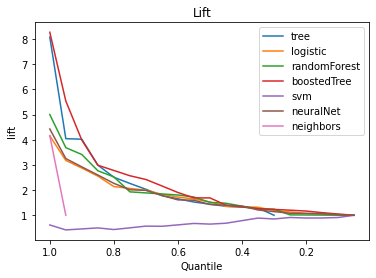

In [342]:
for model in models:
    plt.plot(lifts[model]["Quantile"], lifts[model]["Lift"], label = model)
    plt.gca().invert_xaxis()
    plt.xlabel("Quantile")
    plt.ylabel("lift")
    plt.title("Lift")
    plt.legend()

## Enhancing selected model: Gradient Boosting

In [343]:
gradBoost = GradientBoostingClassifier(max_depth = 3, n_estimators=200, random_state=150)
gradBoost.fit(X_train[selectedFeatures], y_train)

GradientBoostingClassifier(n_estimators=200, random_state=150)

In [344]:
predictions_train   = gradBoost.predict(X_train[selectedFeatures])
probabilities_train = DataFrame(gradBoost.predict_proba(X_train[selectedFeatures]))[1]
predictions_test   = gradBoost.predict(X_test[selectedFeatures])
probabilities_test = DataFrame(gradBoost.predict_proba(X_test[selectedFeatures]))[1]
accuracy_train      = accuracy_score(y_train,predictions_train)
auc_train           = roc_auc_score(array(y_train),array(probabilities_train))
accuracy_test      = accuracy_score(y_test,predictions_test)
auc_test           = roc_auc_score(array(y_test),array(probabilities_test))

performances_gradboost = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test,"AUC Train":auc_train, "AUC Test":auc_test}

In [345]:
performances_gradboost

{'Accuracy Train': 0.9808275297009422,
 'Accuracy Test': 0.9780156757790097,
 'AUC Train': 0.8845667983142881,
 'AUC Test': 0.8591929859038872}

# Campaign 7244

In [346]:
campaign7244 = read_csv("./GROUP ASSIGNMENT DSC use-case-20211202/selection campaign 7244.csv")

In [347]:
campaign7244.shape

(25645, 1)

In [348]:
donors_7244 = pd.merge(donors_full, campaign7244, on="donorID", how="inner")

In [349]:
donors_7244.loc[donors_7244['gender'] == 'M','gender'] = 1
donors_7244.loc[donors_7244['gender'] == 'F','gender'] = 0

# Extract Date from csv
donors_7244["dateOfBirth"] = pd.to_datetime(donors_7244["dateOfBirth"])

# Year
donors_7244["birth_year"] = donors_7244["dateOfBirth"].dt.year

# Donnors Age
donors_7244['age'] = 2008 - donors_7244["birth_year"]

# Age group
donors_7244['age_group'] = donors_7244['age'] // 10 * 10

In [350]:
gifts_train_7244 = gifts.loc[pd.to_datetime(gifts["date"])<=dt.datetime(2019,5,18),:]

In [351]:
donations_per_donor = gifts_train_7244.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_per_donor = donations_per_donor.rename({"min":"min_donation_per_donor", 
                             "max":"max_donation_per_donor", 
                             "sum":"total_donations_per_donor", 
                             "count":"total_donation_times",
                            "mean":"avg_donations_per_donor"}, axis=1)

# Extract the donations in the last 3 months
donations_3months = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2019,2,18),:]
donations_donor_3months = donations_3months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3months = donations_donor_3months.rename({"min":"3m_min_donation_per_donor", 
                             "max":"3m_max_donation_per_donor", 
                             "sum":"3m_total_donations_per_donor", 
                             "count":"3m_total_donation_times",
                                "mean":"3m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 6 months
donations_6months = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2018,11,18),:]
donations_donor_6months = donations_6months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count','mean'])
donations_donor_6months = donations_donor_6months.rename({"min":"6m_min_donation_donor", 
                             "max":"6m_max_donation_per_donor", 
                             "sum":"6m_total_donations_per_donor", 
                             "count":"6m_total_donation_times",
                              "mean": "6m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 9 months

donations_9months = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2018,8,18),:]
donations_donor_9months = donations_9months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_9months = donations_donor_9months.rename({"min":"9m_min_donation_donor", 
                             "max":"9m_max_donation_per_donor", 
                             "sum":"9m_total_donations_per_donor", 
                             "count":"9m_total_donation_times",
                              "mean":"9m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last year

donations_year = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2018,5,18),:]
donations_donor_year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_year = donations_donor_year.rename({"min":"yr_min_donation_donor", 
                             "max":"yr_max_donation_per_donor", 
                             "sum":"yr_total_donations_per_donor", 
                             "count":"yr_total_donation_times",
                             "mean":"yr_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 2 years

donations_2year = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2017,5,18),:]
donations_donor_2year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_2year = donations_donor_2year.rename({"min":"2yr_min_donation_donor", 
                             "max":"2yr_max_donation_per_donor", 
                             "sum":"2yr_total_donations_per_donor", 
                             "count":"2yr_total_donation_times",
                             "mean": "2yr_avg_donations_per_donor"}, axis=1)

# Extract the donations in the last 3 years

donations_3year = gifts_train_7244.loc[pd.to_datetime(gifts_train_7244["date"])>=dt.datetime(2016,5,18),:]
donations_donor_3year = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3year = donations_donor_3year.rename({"min":"3yr_min_donation_donor", 
                             "max":"3yr_max_donation_per_donor", 
                             "sum":"3yr_total_donations_per_donor", 
                             "count":"3yr_total_donation_times",
                             "mean":"3yr_avg_donations_per_donor"}, axis=1)

In [352]:
# Merging with total donations per donor
base_table_7244 = pd.merge(donors_7244,donations_per_donor, on="donorID", how="left" )
base_table_7244.fillna(0, inplace=True)

# Merging with 3 months count
base_table_7244 = pd.merge(base_table_7244,donations_donor_3months, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)
# base_table.isna().sum()

#Merging with 6 months count
base_table_7244 = pd.merge(base_table_7244,donations_donor_6months, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)
base_table_7244.isna().sum()

#Merging with 9 months count
base_table_7244 = pd.merge(base_table_7244,donations_donor_9months, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)
base_table_7244.isna().sum()

#Merging with year count
base_table_7244 = pd.merge(base_table_7244,donations_donor_year, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)
base_table_7244.isna().sum()

# Merging with 2 year count
base_table_7244 = pd.merge(base_table_7244,donations_donor_2year, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)
base_table_7244.isna().sum()

# Merging with 3 year count
base_table_7244 = pd.merge(base_table_7244,donations_donor_3year, on="donorID", how="left" )
base_table_7244.fillna(0, inplace = True)

In [353]:
# Amount and count difference from 3 to 6 months
base_table_7244["3m_6m_amt_diff"] = base_table_7244["6m_total_donations_per_donor"] - base_table_7244["3m_total_donations_per_donor"]
base_table_7244["3m_6m_count_diff"] = base_table_7244["6m_total_donation_times"] - base_table_7244["3m_total_donation_times"] 
# Amount and count difference from 6 to 9 months
base_table_7244["6m_9m_amt_diff"] = base_table_7244["9m_total_donations_per_donor"] - base_table_7244["6m_total_donations_per_donor"]
base_table_7244["6m_9m_count_diff"] = base_table_7244["9m_total_donation_times"] - base_table_7244["6m_total_donation_times"] 
# Amount and count difference from 9 to 12 months
base_table_7244["9m_yr_amt_diff"] = base_table_7244["yr_total_donations_per_donor"] - base_table_7244["9m_total_donations_per_donor"]
base_table_7244["9m_yr_count_diff"] = base_table_7244["yr_total_donation_times"] - base_table_7244["9m_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table_7244["2yr_yr_amt_diff"] = base_table_7244["2yr_total_donations_per_donor"] - base_table_7244["yr_total_donations_per_donor"]
base_table_7244["2yr_yr_amt_diff"] = base_table_7244["2yr_total_donation_times"] - base_table_7244["yr_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table_7244["2yr_yr_amt_diff"] = base_table_7244["3yr_total_donations_per_donor"] - base_table_7244["2yr_total_donations_per_donor"]
base_table_7244["3yr_2yr_amt_diff"] = base_table_7244["3yr_total_donation_times"] - base_table_7244["2yr_total_donation_times"] 

In [354]:
# Creating max year variable 
grouped_year = gifts_train_7244.groupby("donorID")['year'].agg(['max', 'min'])
grouped_year = grouped_year.rename({"max":"max_year", 'min':'min_year'}, axis=1)
grouped_year['year_diff'] = grouped_year['max_year']- grouped_year['min_year']
grouped_year['recency'] = 2018 - grouped_year['max_year']

In [355]:
base_table_7244 = pd.merge(base_table_7244, grouped_year, on="donorID", how="left")
base_table_7244.loc[base_table_7244["max_year"].isna(),"max_year"] = 2019
base_table_7244.loc[base_table_7244["min_year"].isna(),"min_year"] = 2019
base_table_7244.loc[base_table_7244["year_diff"].isna(),"year_diff"] = 0
base_table_7244.loc[base_table_7244["recency"].isna(),"recency"] = 0
base_table_7244["max_year"] = base_table_7244["max_year"].astype(int)
base_table_7244["min_year"] = base_table_7244["min_year"].astype(int)

In [356]:
# Calculating average donations and amount of donations per year
# Adding 1 to avoid division by 0
base_table_7244['donations_count_per_period'] = base_table_7244['total_donation_times']/(base_table_7244['year_diff'].astype(int)+1)
base_table_7244['donations_amount_per_period'] = base_table_7244['total_donations_per_donor']/(base_table_7244['year_diff'].astype(int)+1)

In [357]:
# Ranking donor as exceptional if they have donated above the 99th percentile
# Outliers from total donations per donor
percentiles_dict = base_table_7244["total_donations_per_donor"].quantile([0.01,0.05,0.95,0.99]).to_dict()
upper_outliers = base_table_7244[base_table_7244["total_donations_per_donor"] > percentiles_dict[0.99]][["donorID","total_donations_per_donor"]]
base_table_7244["exceptional_donor"] = base_table_7244["donorID"].isin(upper_outliers["donorID"])
base_table_7244["exceptional_donor"] = base_table_7244["exceptional_donor"].replace({True:1, False:0})

# Ranking donors by donor's amount quantiles
amount_rank= base_table_7244["total_donations_per_donor"].quantile([0.25,0.50,0.75]).to_dict()

base_table_7244["donating_amt_rank"] = 1
base_table_7244.loc[base_table_7244["total_donations_per_donor"]> amount_rank[0.25], "donating_amt_rank"] = 2
base_table_7244.loc[base_table_7244["total_donations_per_donor"]> amount_rank[0.5], "donating_amt_rank"] = 3
base_table_7244.loc[base_table_7244["total_donations_per_donor"]> amount_rank[0.75], "donating_amt_rank"] = 4
base_table_7244.loc[base_table_7244["total_donations_per_donor"]> percentiles_dict[0.99], "donating_amt_rank"] = 5

In [358]:
# Creating donation ranges to check how many times a donor has donated within that range
amount_range = gifts_train_7244["amount"].quantile([0.20,0.40,0.60,0.8]).to_dict()

# Subsetting gifts df to obtain transactions lower than first quantile boundary, then counting by donor ID
count_1st_qtl = pd.DataFrame(
    gifts_train_7244[gifts_train_7244["amount"]<=amount_range[0.2]][["donorID"]].groupby("donorID")["donorID"].count())
count_1st_qtl = count_1st_qtl.rename({"donorID":"donations_1st_qtl_count"}, axis=1)
# Subsetting gifts df to obtain transactions between first and second quantile boundary, then counting by donor ID
count_2nd_qtl = pd.DataFrame(
    gifts_train_7244[(gifts_train_7244["amount"]>amount_range[0.2]) 
                               & (gifts_train_7244["amount"]<=amount_range[0.4])][["donorID"]].groupby("donorID")["donorID"].count())
count_2nd_qtl = count_2nd_qtl.rename({"donorID":"donations_2nd_qtl_count"}, axis=1)

count_3rd_qtl = pd.DataFrame(
    gifts_train_7244[(gifts_train_7244["amount"]> amount_range[0.4])
                               & (gifts_train_7244["amount"]<=amount_range[0.6])][["donorID"]].groupby("donorID")["donorID"].count())
count_3rd_qtl = count_3rd_qtl.rename({"donorID":"donations_3rd_qtl_count"}, axis=1)

count_4th_qtl = pd.DataFrame(
    gifts_train_7244[(gifts_train_7244["amount"]> amount_range[0.6]) 
                               & (gifts_train_7244["amount"]<=amount_range[0.8])][["donorID"]].groupby("donorID")["donorID"].count())
count_4th_qtl = count_4th_qtl.rename({"donorID":"donations_4th_qtl_count"}, axis=1)

count_5th_qtl = pd.DataFrame(
    gifts_train_7244[gifts_train_7244["amount"]>=amount_range[0.8]][["donorID"]].groupby("donorID")["donorID"].count())
count_5th_qtl = count_5th_qtl.rename({"donorID":"donations_5th_qtl_count"}, axis=1)


In [359]:
base_table_7244 = pd.merge(base_table_7244,count_1st_qtl, on="donorID", how="left" )
base_table_7244["donations_1st_qtl_count"].fillna(0, inplace = True)

base_table_7244 = pd.merge(base_table_7244,count_2nd_qtl, on="donorID", how="left" )
base_table_7244["donations_2nd_qtl_count"].fillna(0, inplace = True)

base_table_7244 = pd.merge(base_table_7244,count_3rd_qtl, on="donorID", how="left" )
base_table_7244["donations_3rd_qtl_count"].fillna(0, inplace = True)

base_table_7244 = pd.merge(base_table_7244,count_4th_qtl, on="donorID", how="left" )
base_table_7244["donations_4th_qtl_count"].fillna(0, inplace = True)

base_table_7244 = pd.merge(base_table_7244,count_5th_qtl, on="donorID", how="left" )
base_table_7244["donations_5th_qtl_count"].fillna(0, inplace = True)

In [360]:
# Number of campaigns in which the person has donated
campaing_per_donors = pd.DataFrame(gifts_train_7244.groupby("donorID")["campaignID"].nunique())
campaing_per_donors = campaing_per_donors.rename({"campaignID":"nbr_of_campaigns"}, axis=1)
base_table_7244 = pd.merge(base_table_7244, campaing_per_donors, on="donorID", how="left")
base_table_7244["nbr_of_campaigns"].fillna(0, inplace = True)

# Calculating donations count over period of time  
base_table_7244['donations_count_per_period'] = base_table_7244["total_donation_times"]/(base_table_7244["year_diff"]+1)
base_table_7244['donations_amount_per_period'] = base_table_7244["total_donations_per_donor"]/(base_table_7244["year_diff"]+1)

In [361]:
donations_per_region = base_table_7244.groupby('region')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_region = donations_per_region.rename({"min":"min_donation_per_region", 
                             "max":"max_donation_per_region", 
                             "sum":"total_donations_per_region", 
                             "count":"count_donation_region",
                            'mean':"avg_donations_region"}, axis=1)

donations_per_province = base_table_7244.groupby('province')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_province = donations_per_province.rename({"min":"min_donation_per_province", 
                             "max":"max_donation_per_province", 
                             "sum":"total_donations_per_province", 
                             "count":"total_donation_province",
                            "mean":"avg_donations_province"}, axis=1)

donations_per_language = base_table_7244.groupby('language')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_language = donations_per_language.rename({"min":"min_donation_per_lang", 
                             "max":"max_donation_per_lang", 
                             "sum":"total_donations_per_lang", 
                             "count":"total_donation_lang",
                            "mean":"avg_donations_lang"}, axis=1)
base_table_7244 = pd.merge(base_table_7244, donations_per_language, on="language", how="left")
base_table_7244 = pd.merge(base_table_7244, donations_per_province, on="province", how="left")
base_table_7244 = pd.merge(base_table_7244, donations_per_region, on="region", how="left")


In [362]:
base_table_7244 = pd.get_dummies(base_table_7244, drop_first=True, columns =["region"])
base_table_7244 = pd.get_dummies(base_table_7244, drop_first=True, columns =["province"])
base_table_7244 = pd.get_dummies(base_table_7244, drop_first=True, columns =["language"])

base_table_7244["more_than_once_in_a_campaign"] = (base_table_7244["total_donation_times"] - base_table_7244["nbr_of_campaigns"])>0 
base_table_7244["more_than_once_in_a_campaign"] = base_table_7244["more_than_once_in_a_campaign"].replace({True:1, False:0})

In [363]:
recency_categ = base_table_7244["recency"].quantile([0.20,0.40,0.60,0.80]).to_dict()
base_table_7244["recency_categ"] = 1
base_table_7244.loc[base_table_7244["recency"]> recency_categ[0.20], "recency_categ"] = 2
base_table_7244.loc[base_table_7244["recency"]> recency_categ[0.40], "recency_categ"] = 3
base_table_7244.loc[base_table_7244["recency"]> recency_categ[0.60], "recency_categ"] = 4
base_table_7244.loc[base_table_7244["recency"]> recency_categ[0.80], "recency_categ"] = 5

# Ranking donors by donor's amount quantiles
freq_rank= base_table_7244["total_donation_times"].quantile([0.20,0.40,0.60,0.80]).to_dict()

base_table_7244["freq_rank"] = 1
base_table_7244.loc[base_table_7244["total_donation_times"]> freq_rank[0.20], "freq_rank"] = 2
base_table_7244.loc[base_table_7244["total_donation_times"]> freq_rank[0.40], "freq_rank"] = 3
base_table_7244.loc[base_table_7244["total_donation_times"]> freq_rank[0.60], "freq_rank"] = 4
base_table_7244.loc[base_table_7244["total_donation_times"]> freq_rank[0.80], "freq_rank"] = 5

base_table_7244["donor_rank"] = (base_table_7244["donating_amt_rank"].astype(int) + base_table_7244["recency_categ"].astype(int) + base_table_7244["freq_rank"].astype(int))/3

#### Dependent Variable

In [364]:
gifts_campaign7244 = pd.DataFrame(gifts.loc[(gifts["campaignID"] == 7244) & (gifts["amount"] >= 30), ["donorID", "amount"] ])
gifts_campaign7244["7244_donor"] = "1"

campaign7244 = pd.merge(campaign7244, gifts_campaign7244, on="donorID", how="left" )
campaign7244.loc[campaign7244["7244_donor"].isna(), "7244_donor" ] = "0"
campaign7244.loc[campaign7244["amount"].isna(), "amount" ] = "0"
campaign7244 = campaign7244.rename({"amount":"amt_campaign_7244"}, axis=1)
base_table_7244 = pd.merge(base_table_7244, campaign7244, on="donorID", how="inner")
base_table_7244["7244_donor"] = base_table_7244["7244_donor"].astype(int)
base_table_7244["amt_campaign_7244"] = base_table_7244["amt_campaign_7244"].astype(float)

#### Base Split Features/Target

In [365]:
selectedFeatures

['gender',
 'age_group',
 'min_donation_per_donor',
 'max_donation_per_donor',
 'total_donations_per_donor',
 'avg_donations_per_donor',
 'max_year',
 'min_year',
 'year_diff',
 'recency',
 'donations_count_per_period',
 'donations_amount_per_period',
 'donating_amt_rank',
 'donations_2nd_qtl_count',
 'donations_3rd_qtl_count',
 'donations_4th_qtl_count',
 'donations_5th_qtl_count',
 'nbr_of_campaigns',
 'recency_categ',
 'freq_rank',
 'donor_rank']

In [366]:
X, y = base_table_7244[selectedFeatures], base_table_7244["7244_donor"]

#### Predicting on Campaign 7244

In [367]:
predictions_test   = gradBoost.predict(X)
probabilities_test = DataFrame(gradBoost.predict_proba(X))[1]
accuracy_test      = accuracy_score(y,predictions_test)
auc_test           = roc_auc_score(array(y),array(probabilities_test))

performances = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test,"AUC Train":auc_train, "AUC Test":auc_test}

In [368]:
performances

{'Accuracy Train': 0.9808275297009422,
 'Accuracy Test': 0.9886137648664457,
 'AUC Train': 0.8845667983142881,
 'AUC Test': 0.7816694322235586}

In [369]:
probabilities_test.sort_values(ascending=False)

14803    0.996815
6888     0.974456
2881     0.974418
15701    0.955687
430      0.948906
           ...   
14161    0.000214
12110    0.000198
6373     0.000181
13729    0.000171
21177    0.000170
Name: 1, Length: 25645, dtype: float64

In [370]:
import scikitplot as skplt

In [371]:
predicted_probabilities = gradBoost.predict_proba(X)

## Lift, response & gains 7244

In [372]:
base_table_7244["predicted_proba"] = predicted_probabilities[:,1]

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

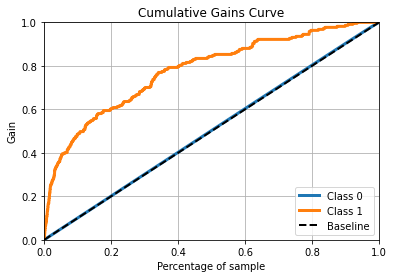

In [373]:
skplt.metrics.plot_cumulative_gain(y, predicted_probabilities)

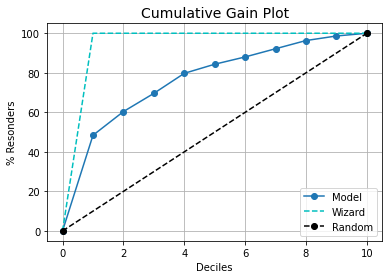

In [374]:
import kds
kds.metrics.plot_cumulative_gain(y, predicted_probabilities[:,1])

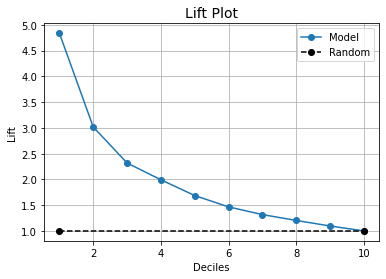

In [375]:
kds.metrics.plot_lift(y, predicted_probabilities[:,1])

In [376]:
base_table_sorted = base_table_7244.sort_values(by="predicted_proba", ascending=False)

In [377]:
base_table_sorted

,Unnamed: 0,donorID,zipcode,gender,dateOfBirth,birth_year,age,age_group,min_donation_per_donor,max_donation_per_donor,total_donations_per_donor,total_donation_times,avg_donations_per_donor,3m_min_donation_per_donor,3m_max_donation_per_donor,3m_total_donations_per_donor,3m_total_donation_times,3m_avg_donations_per_donor,6m_min_donation_donor,6m_max_donation_per_donor,6m_total_donations_per_donor,6m_total_donation_times,6m_avg_donations_per_donor,9m_min_donation_donor,9m_max_donation_per_donor,9m_total_donations_per_donor,9m_total_donation_times,9m_avg_donations_per_donor,yr_min_donation_donor,yr_max_donation_per_donor,yr_total_donations_per_donor,yr_total_donation_times,yr_avg_donations_per_donor,2yr_min_donation_donor,2yr_max_donation_per_donor,2yr_total_donations_per_donor,2yr_total_donation_times,2yr_avg_donations_per_donor,3yr_min_donation_donor,3yr_max_donation_per_donor,3yr_total_donations_per_donor,3yr_total_donation_times,3yr_avg_donations_per_donor,3m_6m_amt_diff,3m_6m_count_diff,6m_9m_amt_diff,6m_9m_count_diff,9m_yr_amt_diff,9m_yr_count_diff,2yr_yr_amt_diff,3yr_2yr_amt_diff,max_year,min_year,year_diff,recency,donations_count_per_period,donations_amount_per_period,exceptional_donor,donating_amt_rank,donations_1st_qtl_count,donations_2nd_qtl_count,donations_3rd_qtl_count,donations_4th_qtl_count,donations_5th_qtl_count,nbr_of_campaigns,min_donation_per_lang,max_donation_per_lang,total_donations_per_lang,total_donation_lang,avg_donations_lang,min_donation_per_province,max_donation_per_province,total_donations_per_province,total_donation_province,avg_donations_province,min_donation_per_region,max_donation_per_region,total_donations_per_region,count_donation_region,avg_donations_region,region_Flanders,region_Missing,region_Wallonia,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,language_FR,language_NL,more_than_once_in_a_campaign,recency_categ,freq_rank,donor_rank,amt_campaign_7244,7244_donor,predicted_proba
14803,27656,127657,9690.0,0,1927-10-23,1927,81,80,45.400,56.660,102.060,2.0,51.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,2010,1.0,7.0,1.000,51.03000,0,3,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4000030.00,9.287025e+06,23346,397.799405,5.0,2479000.00,3.098324e+06,5428,570.804036,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,3,3.000000,0.0,0,0.996815
6888,15384,115385,8210.0,0,1951-03-19,1951,57,50,51.000,51.000,51.000,1.0,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,2010,0.0,8.0,1.000,51.00000,0,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4000030.00,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.810449,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1,2.666667,0.0,0,0.974456
2881,6346,106347,8300.0,0,1921-06-19,1921,87,80,13.629,13.629,95.403,7.0,13.629000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,2005,3.0,10.0,1.750,23.85075,0,3,0.0,7.0,0.0,0.0,0.0,7.0,0.0,4000030.00,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.810449,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5,5,4.333333,80.0,1,0.974418
15701,28990,128991,8780.0,0,1959-03-01,1959,49,40,51.000,51.000,51.000,1.0,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,2010,0.0,8.0,1.000,51.00000,0,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4000030.00,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.810449,0.0,400

In [378]:
base_table_sorted["decile_rank"] = pd.qcut(base_table_sorted['predicted_proba'], 10,
                            labels = False)

In [379]:
pd.set_option("display.max_columns", None)
base_table_sorted.head()

,Unnamed: 0,donorID,zipcode,gender,dateOfBirth,birth_year,age,age_group,min_donation_per_donor,max_donation_per_donor,total_donations_per_donor,total_donation_times,avg_donations_per_donor,3m_min_donation_per_donor,3m_max_donation_per_donor,3m_total_donations_per_donor,3m_total_donation_times,3m_avg_donations_per_donor,6m_min_donation_donor,6m_max_donation_per_donor,6m_total_donations_per_donor,6m_total_donation_times,6m_avg_donations_per_donor,9m_min_donation_donor,9m_max_donation_per_donor,9m_total_donations_per_donor,9m_total_donation_times,9m_avg_donations_per_donor,yr_min_donation_donor,yr_max_donation_per_donor,yr_total_donations_per_donor,yr_total_donation_times,yr_avg_donations_per_donor,2yr_min_donation_donor,2yr_max_donation_per_donor,2yr_total_donations_per_donor,2yr_total_donation_times,2yr_avg_donations_per_donor,3yr_min_donation_donor,3yr_max_donation_per_donor,3yr_total_donations_per_donor,3yr_total_donation_times,3yr_avg_donations_per_donor,3m_6m_amt_diff,3m_6m_count_diff,6m_9m_amt_diff,6m_9m_count_diff,9m_yr_amt_diff,9m_yr_count_diff,2yr_yr_amt_diff,3yr_2yr_amt_diff,max_year,min_year,year_diff,recency,donations_count_per_period,donations_amount_per_period,exceptional_donor,donating_amt_rank,donations_1st_qtl_count,donations_2nd_qtl_count,donations_3rd_qtl_count,donations_4th_qtl_count,donations_5th_qtl_count,nbr_of_campaigns,min_donation_per_lang,max_donation_per_lang,total_donations_per_lang,total_donation_lang,avg_donations_lang,min_donation_per_province,max_donation_per_province,total_donations_per_province,total_donation_province,avg_donations_province,min_donation_per_region,max_donation_per_region,total_donations_per_region,count_donation_region,avg_donations_region,region_Flanders,region_Missing,region_Wallonia,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,language_FR,language_NL,more_than_once_in_a_campaign,recency_categ,freq_rank,donor_rank,amt_campaign_7244,7244_donor,predicted_proba,decile_rank
14803,27656,127657,9690.0,0,1927-10-23,1927,81,80,45.400,56.660,102.060,2.0,51.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011,2010,1.0,7.0,1.000,51.03000,0,3,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4000030.0,9.287025e+06,23346,397.799405,5.0,2479000.00,3.098324e+06,5428,570.804036,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,3,3.000000,0.0,0,0.996815,9
6888,15384,115385,8210.0,0,1951-03-19,1951,57,50,51.000,51.000,51.000,1.0,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,2010,0.0,8.0,1.000,51.00000,0,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4000030.0,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.810449,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4,1,2.666667,0.0,0,0.974456,9
2881,6346,106347,8300.0,0,1921-06-19,1921,87,80,13.629,13.629,95.403,7.0,13.629000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,2005,3.0,10.0,1.750,23.85075,0,3,0.0,7.0,0.0,0.0,0.0,7.0,0.0,4000030.0,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.810449,0.0,4000030.0,9.306696e+06,23439,397.060266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5,5,4.333333,80.0,1,0.974418,9
15701,28990,128991,8780.0,0,1959-03-01,1959,49,40,51.000,51.000,51.000,1.0,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,2010,0.0,8.0,1.000,51.00000,0,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4000030.0,9.287025e+06,23346,397.799405,5.0,9697.81,7.170236e+05,5241,136.

In [380]:
decile_values = base_table_sorted.groupby('decile_rank')['predicted_proba'].agg(['min','max', 'count'])

In [381]:
decile_values = decile_values.sort_values(by="decile_rank", ascending= False)

In [382]:
decile_values = decile_values.reset_index()

In [383]:
decile_values

,decile_rank,min,max,count
0,9,0.021763,0.996815,2565
1,8,0.009988,0.021761,2564
2,7,0.006235,0.009978,2563
3,6,0.004292,0.006234,2566
4,5,0.003126,0.004291,2562
5,4,0.002353,0.003125,2557
6,3,0.001804,0.002353,2574
7,2,0.001349,0.001803,2565
8,1,0.000969,0.001348,2557
9,0,0.000170,0.000969,2572


## Business Case

In [384]:
total_donors = 0
total_count = 0
total_sum_donation = 0
letter_cost = 0.80
random_response = (217/25645) # Total donors over total campaign potential donors
# Range up to 9 (deciles)
for decile in range(0,10):
    # Get decile by index
    decile_rank = decile_values["decile_rank"][decile]
    # Calculating donors in each decile
    decile_donors_df = base_table_sorted[(base_table_sorted.decile_rank == decile_rank) & base_table_sorted["7244_donor"] == 1 ]
    # Get total donors per decile
    decile_donors = len(decile_donors_df)
    # Cumulative donors through deciles
    total_donors = total_donors + decile_donors
    # Cumulative count through deciles
    total_count = total_count + decile_values["count"][decile]
    # Assigning values to columns
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "decile_donors"]= decile_donors
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "total_donors"]= total_donors
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "total_count"]= total_count
    # Response with current campaign
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "response"]= total_donors/total_count
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "random_response"]= random_response

    # Sum of donations per decile
    sum_donations_per_decile = decile_donors_df["amt_campaign_7244"].sum()
    # Cumulative sum through donations
    total_sum_donation = total_sum_donation + sum_donations_per_decile
    # Avg donations over donors
    avg_donation_amt = total_sum_donation/total_donors
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "avg_donation_amt"]= avg_donation_amt
    # Cost = cost*count of target
    decile_cost = total_count*letter_cost
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "decile_cost"] = decile_cost
    # Income = donors * avg amount per decile
    decile_income = total_donors*avg_donation_amt
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "decile_income"] = decile_income
    # Real profit is what the current campaign contributed
    real_profit = decile_income-decile_cost
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "decile_real_profit"] = real_profit
    # Random campaign profit
    random_profit = ((random_response * total_count)* avg_donation_amt) - decile_cost
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "random_profit"] = random_profit
    
    # Variance between potential and real profits
    decile_values.loc[decile_values["decile_rank"] == decile_rank, "profit_var"] = (real_profit - random_profit)/abs(random_profit)
# Cumulative gains in euros
decile_values["profits_cumul_gains"] = decile_values["decile_income"]/decile_values["decile_income"].max()

In [385]:
decile_values.to_csv("./Group Project/Data Exploration/business_case_7244.csv")

## Campaign 7362

In [386]:
campaign7362 = read_csv("./GROUP ASSIGNMENT DSC use-case-20211202/new_campaign_selection.csv")

In [387]:
donors_7362 = pd.merge(donors_full, campaign7362, on="donorID", how="inner")

In [388]:
donors_7362.loc[donors_7362['gender'] == 'M','gender'] = 1
donors_7362.loc[donors_7362['gender'] == 'F','gender'] = 0

In [389]:
# Extract Date from csv
donors_7362["dateOfBirth"] = pd.to_datetime(donors_7362["dateOfBirth"])

# Year
donors_7362["birth_year"] = donors_7362["dateOfBirth"].dt.year

# Donnors Age
donors_7362['age'] = 2008 - donors_7362["birth_year"]

# Age group
donors_7362['age_group'] = donors_7362['age'] // 10 * 10

gifts_train_7362 = gifts.loc[pd.to_datetime(gifts["date"])<=dt.datetime(2019,12,31),:] # less than jan 1 2020


donations_per_donor_7362 = gifts_train_7362.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_per_donor_7362 = donations_per_donor.rename({"min":"min_donation_per_donor", 
                             "max":"max_donation_per_donor", 
                             "sum":"total_donations_per_donor", 
                             "count":"total_donation_times",
                            "mean":"avg_donations_per_donor"}, axis=1)

# Extract the donations in the last 3 months
donations_3months_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2019,9,1),:]
donations_donor_3months_7362 = donations_3months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3months_7362 = donations_donor_3months.rename({"min":"3m_min_donation_per_donor", 
                             "max":"3m_max_donation_per_donor", 
                             "sum":"3m_total_donations_per_donor", 
                             "count":"3m_total_donation_times",
                                "mean":"3m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 6 months
donations_6months_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2019,6,1),:]
donations_donor_6months_7362 = donations_6months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count','mean'])
donations_donor_6months_7362 = donations_donor_6months.rename({"min":"6m_min_donation_donor", 
                             "max":"6m_max_donation_per_donor", 
                             "sum":"6m_total_donations_per_donor", 
                             "count":"6m_total_donation_times",
                              "mean": "6m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 9 months

donations_9months_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2019,3,1),:]
donations_donor_9months_7362 = donations_9months.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_9months_7362 = donations_donor_9months.rename({"min":"9m_min_donation_donor", 
                             "max":"9m_max_donation_per_donor", 
                             "sum":"9m_total_donations_per_donor", 
                             "count":"9m_total_donation_times",
                              "mean":"9m_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last year

donations_year_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2018,12,31),:]
donations_donor_year_7362 = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_year_7362 = donations_donor_year.rename({"min":"yr_min_donation_donor", 
                             "max":"yr_max_donation_per_donor", 
                             "sum":"yr_total_donations_per_donor", 
                             "count":"yr_total_donation_times",
                             "mean":"yr_avg_donations_per_donor"}, axis=1)
# Extract the donations in the last 2 years

donations_donor_2year_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2017,12,31),:]
donations_donor_2year_7362 = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_2year_7362 = donations_donor_2year.rename({"min":"2yr_min_donation_donor", 
                             "max":"2yr_max_donation_per_donor", 
                             "sum":"2yr_total_donations_per_donor", 
                             "count":"2yr_total_donation_times",
                             "mean": "2yr_avg_donations_per_donor"}, axis=1)

# Extract the donations in the last 3 years

donations_3year_7362 = gifts_train_7362.loc[pd.to_datetime(gifts_train_7362["date"])>=dt.datetime(2016,12,31),:]
donations_donor_3year_7362 = donations_year.groupby('donorID')['amount'].agg(['min', 'max', 'sum', 'count', 'mean'])
donations_donor_3year_7362 = donations_donor_3year.rename({"min":"3yr_min_donation_donor", 
                             "max":"3yr_max_donation_per_donor", 
                             "sum":"3yr_total_donations_per_donor", 
                             "count":"3yr_total_donation_times",
                             "mean":"3yr_avg_donations_per_donor"}, axis=1)

In [390]:
# Merging with total donations per donor
base_table_7362 = pd.merge(donors_7362,donations_per_donor_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace=True)

# Merging with 3 months count
base_table_7362 = pd.merge(base_table_7362,donations_donor_3months_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)
# base_table.isna().sum()

#Merging with 6 months count
base_table_7362 = pd.merge(base_table_7362,donations_donor_6months_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)
base_table_7362.isna().sum()

#Merging with 9 months count
base_table_7362 = pd.merge(base_table_7362,donations_donor_9months_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)
base_table_7362.isna().sum()

#Merging with year count
base_table_7362 = pd.merge(base_table_7362,donations_donor_year_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)
base_table_7362.isna().sum()

# Merging with 2 year count
base_table_7362 = pd.merge(base_table_7362,donations_donor_2year_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)
base_table_7362.isna().sum()

# Merging with 3 year count
base_table_7362 = pd.merge(base_table_7362,donations_donor_3year_7362, on="donorID", how="left" )
base_table_7362.fillna(0, inplace = True)


# Amount and count difference from 3 to 6 months
base_table_7362["3m_6m_amt_diff"] = base_table_7362["6m_total_donations_per_donor"] - base_table_7362["3m_total_donations_per_donor"]
base_table_7362["3m_6m_count_diff"] = base_table_7362["6m_total_donation_times"] - base_table_7362["3m_total_donation_times"] 
# Amount and count difference from 6 to 9 months
base_table_7362["6m_9m_amt_diff"] = base_table_7362["9m_total_donations_per_donor"] - base_table_7362["6m_total_donations_per_donor"]
base_table_7362["6m_9m_count_diff"] = base_table_7362["9m_total_donation_times"] - base_table_7362["6m_total_donation_times"] 
# Amount and count difference from 9 to 12 months
base_table_7362["9m_yr_amt_diff"] = base_table_7362["yr_total_donations_per_donor"] - base_table_7362["9m_total_donations_per_donor"]
base_table_7362["9m_yr_count_diff"] = base_table_7362["yr_total_donation_times"] - base_table_7362["9m_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table_7362["2yr_yr_amt_diff"] = base_table_7362["2yr_total_donations_per_donor"] - base_table_7362["yr_total_donations_per_donor"]
base_table_7362["2yr_yr_amt_diff"] = base_table_7362["2yr_total_donation_times"] - base_table_7362["yr_total_donation_times"] 
# Amount and count difference from 1 to 2 years
base_table_7362["2yr_yr_amt_diff"] = base_table_7362["3yr_total_donations_per_donor"] - base_table_7362["2yr_total_donations_per_donor"]
base_table_7362["3yr_2yr_amt_diff"] = base_table_7362["3yr_total_donation_times"] - base_table_7362["2yr_total_donation_times"] 


# Creating max year variable 
grouped_year = gifts_train_7362.groupby("donorID")['year'].agg(['max', 'min'])
grouped_year = grouped_year.rename({"max":"max_year", 'min':'min_year'}, axis=1)
grouped_year['year_diff'] = grouped_year['max_year']- grouped_year['min_year']
grouped_year['recency'] = 2018 - grouped_year['max_year']

base_table_7362 = pd.merge(base_table_7362, grouped_year, on="donorID", how="left")
base_table_7362.loc[base_table_7362["max_year"].isna(),"max_year"] = 2019
base_table_7362.loc[base_table_7362["min_year"].isna(),"min_year"] = 2019
base_table_7362.loc[base_table_7362["year_diff"].isna(),"year_diff"] = 0
base_table_7362.loc[base_table_7362["recency"].isna(),"recency"] = 0
base_table_7362["max_year"] = base_table_7362["max_year"].astype(int)
base_table_7362["min_year"] = base_table_7362["min_year"].astype(int)

In [391]:
# Calculating average donations and amount of donations per year
# Adding 1 to avoid division by 0
base_table_7362['donations_count_per_period'] = base_table_7362['total_donation_times']/(base_table_7362['year_diff'].astype(int)+1)
base_table_7362['donations_amount_per_period'] = base_table_7362['total_donations_per_donor']/(base_table_7362['year_diff'].astype(int)+1)

# Ranking donor as exceptional if they have donated above the 99th percentile
# Outliers from total donations per donor
percentiles_dict = base_table_7362["total_donations_per_donor"].quantile([0.01,0.05,0.95,0.99]).to_dict()
upper_outliers = base_table_7362[base_table_7362["total_donations_per_donor"] > percentiles_dict[0.99]][["donorID","total_donations_per_donor"]]
base_table_7362["exceptional_donor"] = base_table_7362["donorID"].isin(upper_outliers["donorID"])
base_table_7362["exceptional_donor"] = base_table_7362["exceptional_donor"].replace({True:1, False:0})

# Ranking donors by donor's amount quantiles
amount_rank= base_table_7362["total_donations_per_donor"].quantile([0.25,0.50,0.75]).to_dict()

base_table_7362["donating_amt_rank"] = 1
base_table_7362.loc[base_table_7362["total_donations_per_donor"]> amount_rank[0.25], "donating_amt_rank"] = 2
base_table_7362.loc[base_table_7362["total_donations_per_donor"]> amount_rank[0.5], "donating_amt_rank"] = 3
base_table_7362.loc[base_table_7362["total_donations_per_donor"]> amount_rank[0.75], "donating_amt_rank"] = 4
base_table_7362.loc[base_table_7362["total_donations_per_donor"]> percentiles_dict[0.99], "donating_amt_rank"] = 5


# Creating donation ranges to check how many times a donor has donated within that range
amount_range = gifts_train_7362["amount"].quantile([0.20,0.40,0.60,0.8]).to_dict()

# Subsetting gifts df to obtain transactions lower than first quantile boundary, then counting by donor ID
count_1st_qtl = pd.DataFrame(
    gifts_train_7362[gifts_train_7362["amount"]<=amount_range[0.2]][["donorID"]].groupby("donorID")["donorID"].count())
count_1st_qtl = count_1st_qtl.rename({"donorID":"donations_1st_qtl_count"}, axis=1)
# Subsetting gifts df to obtain transactions between first and second quantile boundary, then counting by donor ID
count_2nd_qtl = pd.DataFrame(
    gifts_train_7362[(gifts_train_7362["amount"]>amount_range[0.2]) 
                               & (gifts_train_7362["amount"]<=amount_range[0.4])][["donorID"]].groupby("donorID")["donorID"].count())
count_2nd_qtl = count_2nd_qtl.rename({"donorID":"donations_2nd_qtl_count"}, axis=1)

count_3rd_qtl = pd.DataFrame(
    gifts_train_7362[(gifts_train_7362["amount"]> amount_range[0.4])
                               & (gifts_train_7362["amount"]<=amount_range[0.6])][["donorID"]].groupby("donorID")["donorID"].count())
count_3rd_qtl = count_3rd_qtl.rename({"donorID":"donations_3rd_qtl_count"}, axis=1)

count_4th_qtl = pd.DataFrame(
    gifts_train_7362[(gifts_train_7362["amount"]> amount_range[0.6]) 
                               & (gifts_train_7362["amount"]<=amount_range[0.8])][["donorID"]].groupby("donorID")["donorID"].count())
count_4th_qtl = count_4th_qtl.rename({"donorID":"donations_4th_qtl_count"}, axis=1)

count_5th_qtl = pd.DataFrame(
    gifts_train_7362[gifts_train_7362["amount"]>=amount_range[0.8]][["donorID"]].groupby("donorID")["donorID"].count())
count_5th_qtl = count_5th_qtl.rename({"donorID":"donations_5th_qtl_count"}, axis=1)



base_table_7362 = pd.merge(base_table_7362,count_1st_qtl, on="donorID", how="left" )
base_table_7362["donations_1st_qtl_count"].fillna(0, inplace = True)

base_table_7362 = pd.merge(base_table_7362,count_2nd_qtl, on="donorID", how="left" )
base_table_7362["donations_2nd_qtl_count"].fillna(0, inplace = True)

base_table_7362 = pd.merge(base_table_7362,count_3rd_qtl, on="donorID", how="left" )
base_table_7362["donations_3rd_qtl_count"].fillna(0, inplace = True)

base_table_7362 = pd.merge(base_table_7362,count_4th_qtl, on="donorID", how="left" )
base_table_7362["donations_4th_qtl_count"].fillna(0, inplace = True)

base_table_7362 = pd.merge(base_table_7362,count_5th_qtl, on="donorID", how="left" )
base_table_7362["donations_5th_qtl_count"].fillna(0, inplace = True)

In [392]:
# Number of campaigns in which the person has donated
campaing_per_donors = pd.DataFrame(gifts_train_7362.groupby("donorID")["campaignID"].nunique())

In [393]:
campaing_per_donors = campaing_per_donors.rename({"campaignID":"nbr_of_campaigns"}, axis=1)
base_table_7362 = pd.merge(base_table_7362, campaing_per_donors, on="donorID", how="left")
base_table_7362["nbr_of_campaigns"].fillna(0, inplace = True)

In [394]:

# Calculating donations count over period of time  
base_table_7362['donations_count_per_period'] = base_table_7362["total_donation_times"]/(base_table_7362["year_diff"]+1)
base_table_7362['donations_amount_per_period'] = base_table_7362["total_donations_per_donor"]/(base_table_7362["year_diff"]+1)

donations_per_region = base_table_7362.groupby('region')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_region = donations_per_region.rename({"min":"min_donation_per_region", 
                             "max":"max_donation_per_region", 
                             "sum":"total_donations_per_region", 
                             "count":"count_donation_region",
                            'mean':"avg_donations_region"}, axis=1)

donations_per_province = base_table_7362.groupby('province')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_province = donations_per_province.rename({"min":"min_donation_per_province", 
                             "max":"max_donation_per_province", 
                             "sum":"total_donations_per_province", 
                             "count":"total_donation_province",
                            "mean":"avg_donations_province"}, axis=1)

donations_per_language = base_table_7362.groupby('language')['total_donations_per_donor'].agg(['min', 'max', 'sum', 'count','mean'])
donations_per_language = donations_per_language.rename({"min":"min_donation_per_lang", 
                             "max":"max_donation_per_lang", 
                             "sum":"total_donations_per_lang", 
                             "count":"total_donation_lang",
                            "mean":"avg_donations_lang"}, axis=1)
base_table_7362 = pd.merge(base_table_7362, donations_per_language, on="language", how="left")
base_table_7362 = pd.merge(base_table_7362, donations_per_province, on="province", how="left")
base_table_7362 = pd.merge(base_table_7362, donations_per_region, on="region", how="left")



base_table_7362 = pd.get_dummies(base_table_7362, drop_first=True, columns =["region"])
base_table_7362 = pd.get_dummies(base_table_7362, drop_first=True, columns =["province"])
base_table_7362 = pd.get_dummies(base_table_7362, drop_first=True, columns =["language"])

base_table_7362["more_than_once_in_a_campaign"] = (base_table_7362["total_donation_times"] - base_table_7362["nbr_of_campaigns"])>0 
base_table_7362["more_than_once_in_a_campaign"] = base_table_7362["more_than_once_in_a_campaign"].replace({True:1, False:0})



recency_categ = base_table_7362["recency"].quantile([0.20,0.40,0.60,0.80]).to_dict()
base_table_7362["recency_categ"] = 1
base_table_7362.loc[base_table_7362["recency"]> recency_categ[0.20], "recency_categ"] = 2
base_table_7362.loc[base_table_7362["recency"]> recency_categ[0.40], "recency_categ"] = 3
base_table_7362.loc[base_table_7362["recency"]> recency_categ[0.60], "recency_categ"] = 4
base_table_7362.loc[base_table_7362["recency"]> recency_categ[0.80], "recency_categ"] = 5

# Ranking donors by donor's amount quantiles
freq_rank= base_table_7362["total_donation_times"].quantile([0.20,0.40,0.60,0.80]).to_dict()

base_table_7362["freq_rank"] = 1
base_table_7362.loc[base_table_7362["total_donation_times"]> freq_rank[0.20], "freq_rank"] = 2
base_table_7362.loc[base_table_7362["total_donation_times"]> freq_rank[0.40], "freq_rank"] = 3
base_table_7362.loc[base_table_7362["total_donation_times"]> freq_rank[0.60], "freq_rank"] = 4
base_table_7362.loc[base_table_7362["total_donation_times"]> freq_rank[0.80], "freq_rank"] = 5

base_table_7362["donor_rank"] = (base_table_7362["donating_amt_rank"].astype(int) + base_table_7362["recency_categ"].astype(int) + base_table_7362["freq_rank"].astype(int))/3

X = base_table_7362[selectedFeatures]

## Predicted Proba 7362

In [395]:
predicted_probabilities_7362 = gradBoost.predict_proba(X)

### Sorted Campaign 

In [396]:
base_table_7362["predicted_proba"] = predicted_probabilities_7362[:,1]

In [397]:
base_table_sorted_7362 = base_table_7362.sort_values(by="predicted_proba", ascending=False)

In [398]:
base_table_sorted_7362_predict = base_table_sorted_7362.loc[:,['donorID','predicted_proba']]
base_table_sorted_7362_predict.to_csv("./Group Project/Campaign_7362/campaign_7362_predictions.csv", index= False )

# Profiling - Based on 7244 Campaign

In [399]:
best_pro[selectedFeatures].head()

,gender,age_group,min_donation_per_donor,max_donation_per_donor,total_donations_per_donor,avg_donations_per_donor,max_year,min_year,year_diff,recency,donations_count_per_period,donations_amount_per_period,donating_amt_rank,donations_2nd_qtl_count,donations_3rd_qtl_count,donations_4th_qtl_count,donations_5th_qtl_count,nbr_of_campaigns,recency_categ,freq_rank,donor_rank
14803,0,80,45.400,56.660,102.060,51.030000,2011,2010,1.0,7.0,1.000,51.03000,3,0.0,0.0,0.0,2.0,2.0,3,3,3.000000
6888,0,50,51.000,51.000,51.000,51.000000,2010,2010,0.0,8.0,1.000,51.00000,3,0.0,0.0,0.0,1.0,1.0,4,1,2.666667
2881,0,80,13.629,13.629,95.403,13.629000,2008,2005,3.0,10.0,1.750,23.85075,3,7.0,0.0,0.0,0.0,7.0,5,5,4.333333
15701,0,40,51.000,51.000,51.000,51.000000,2010,2010,0.0,8.0,1.000,51.00000,3,0.0,0.0,0.0,1.0,1.0,4,1,2.666667
430,0,70,7.440,64.450,431.960,25.409412,2012,2005,7.0,6.0,2.125,53.99500,4,13.0,0.0,0.0,3.0,17.0,3,5,4.000000


### High Probab Profile Selection

In [400]:
is_good = base_table_sorted['predicted_proba'] >= 0.022193
best_pro = base_table_sorted[is_good]
best_pro_feat = best_pro[selectedFeatures]

In [401]:
best_pro_feat['gender'] = best_pro_feat['gender'].replace({0:'Female', 1:'Male'})

C:\Users\PROMAN~1\AppData\Local\Temp/ipykernel_10320/2325567449.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Less Probab Profile Selection 

In [402]:
is_bad = base_table_sorted['predicted_proba'] <= 0.000988
bad_pro = base_table_sorted[is_bad]
bad_pro_feat = bad_pro[selectedFeatures]
bad_pro_feat['gender'] = bad_pro_feat['gender'].replace({0:'Female', 1:'Male'})

C:\Users\PROMAN~1\AppData\Local\Temp/ipykernel_10320/748312219.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Graphs

In [403]:
best_by_gender = DataFrame(best_pro_feat.groupby(by='gender').total_donations_per_donor.count())
worst_by_gender = DataFrame(bad_pro_feat.groupby(by='gender').total_donations_per_donor.count())

In [404]:
best_by_gender = best_by_gender.reset_index()
worst_by_gender = worst_by_gender.reset_index()
# best_by_gender['gender'] = best_by_gender['gender'].replace({'0':'Female', '1':'Male'})

In [405]:
worst_by_gender

,gender,total_donations_per_donor
0,Female,69
1,Male,2563


In [406]:
fig = go.Figure(data=[
    go.Bar(name='High Profile', x=best_by_gender["gender"], y=best_by_gender["total_donations_per_donor"]),
    go.Bar(name='Low Profile', x=worst_by_gender["gender"], y=worst_by_gender["total_donations_per_donor"])
])
fig.update_layout(
    title="Profile Donors Count by Gender",
    xaxis_title="Gender",
    yaxis_title="Count of donors")
fig.show()

In [407]:
best_by_age_group = DataFrame(best_pro_feat.groupby('age_group')['total_donations_per_donor'].count())
best_by_age_group = best_by_age_group.reset_index()

worst_by_age_group = DataFrame(bad_pro_feat.groupby('age_group')['total_donations_per_donor'].count())
worst_by_age_group = worst_by_age_group.reset_index()

In [408]:
best_by_age_group

,age_group,total_donations_per_donor
0,10,95
1,20,257
2,30,338
3,40,472
4,50,496
5,60,491
6,70,237
7,80,125


In [409]:
fig = go.Figure(data=[
    go.Bar(name='High Profile', x=best_by_age_group["age_group"], y=best_by_age_group["total_donations_per_donor"])])
fig.update_layout(
    title="High Profile Donors Count by Age Group",
    xaxis_title="Age group",
    yaxis_title="Count of donors")
fig.show()

In [410]:
best_agegroups_pct = best_by_age_group[best_by_age_group["age_group"].isin([40,50,60])]["total_donations_per_donor"].sum()
total_agegroups = best_by_age_group["total_donations_per_donor"].sum()
other_agegroups = total_agegroups - best_agegroups_pct

In [411]:
best_agegroups_pct/total_agegroups

0.5810434090003983

In [412]:
labels = ['3 Top Age groups','Other Donors']
values = [best_agegroups_pct, other_agegroups]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(
    title="High Profile 3 Top Age Groups Percentage")
fig.show()

In [413]:
best_by_gender_agegroup = DataFrame(best_pro_feat.groupby(['age_group','gender']).total_donations_per_donor.count()).unstack('gender')
best_by_gender_agegroup = best_by_gender_agegroup.reset_index()

worst_by_gender_agegroup = DataFrame(bad_pro_feat.groupby(['age_group','gender']).total_donations_per_donor.count()).unstack('gender')
worst_by_gender_agegroup = worst_by_gender_agegroup.reset_index()

best_by_gender_agegroup.columns = ["age_group", "Female", "Male"]
worst_by_gender_agegroup.columns = ["age_group", "Female", "Male"]

In [414]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=best_by_gender_agegroup["age_group"], y=best_by_gender_agegroup["Female"]),
    go.Bar(name='Male', x=best_by_gender_agegroup["age_group"], y=best_by_gender_agegroup["Male"])])
fig.update_layout(
    title="High Profile Donors Count by Gender and Age Group",
    xaxis_title="Age group",
    yaxis_title="Count of donors")
fig.show()

In [415]:
fig = go.Figure(data=[
    go.Bar(name='Low Profile', x=worst_by_age_group["age_group"], y=worst_by_age_group["total_donations_per_donor"])])
fig.update_layout(
    title="Low Profile Donors Count by Age Group",
        xaxis_title="Age group",
    yaxis_title="Count of donors")
fig.show()

In [416]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=worst_by_gender_agegroup["age_group"], y=worst_by_gender_agegroup["Female"]),
    go.Bar(name='Male', x=worst_by_gender_agegroup["age_group"], y=worst_by_gender_agegroup["Male"])
])
fig.update_layout(
    title="Low Profile Donors Count by Gender and Age Group",
        xaxis_title="Age group",
    yaxis_title="Count of donors")
fig.show()

In [417]:
fig = go.Figure(data=[
    go.Bar(name='High Profile', x=best_by_age_group["age_group"], y=best_by_age_group["total_donations_per_donor"]),
    go.Bar(name='Low Profile', x=worst_by_age_group["age_group"], y=worst_by_age_group["total_donations_per_donor"])])
fig.update_layout(
    title="High Profile vs Low Profile Donors Count by Age Group",
    xaxis_title="Age group",
    yaxis_title="Count of donors")
fig.show()

In [418]:


fig = go.Figure(data=[
    go.Bar(name='High Profile', x=["High Profile", "Low Profile"], y=[best_pro_feat["total_donations_per_donor"].median(),bad_pro_feat["total_donations_per_donor"].median() ])
])

fig.update_layout(
    title="High Profile vs Low Profile Median Amount Donations",
    yaxis_title="Donations per donor")
fig.show()
